# Sales Data Analysis

## Here we will analyse the data for different purposes with the help of python module .

### At first we have to import the modules which we will use in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Import dataset from the operating system

In [2]:
Filelist=os.listdir('D:\sales_data\data')
path='D:\sales_data\data'
dataset=pd.DataFrame()

In [3]:
for file in Filelist:   
    month=pd.read_csv(path + "/" + file)
    dataset=pd.concat([dataset,month])

In [4]:
dataset.to_csv('D:\sales_data\dataset.csv',index=False)

In [5]:
dataset.shape

(186850, 6)

In [6]:
dataset.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
dataset.info

<bound method DataFrame.info of       Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/1

In [8]:
dataset.describe

<bound method NDFrame.describe of       Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19

## Data Processing

In [9]:
dataset.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
dataset=dataset.dropna(how="all")

### Lets see how the dataset looks after removing the null value

In [11]:
dataset.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
dataset.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Study the data by each column

In [13]:
dataset['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

Here we can see that there is a string value called 'Price Each' in this array. we can't analyse the value in integer or float value for this . Thus we have to update the values where the wrong data doesn't exist.

In [14]:
dataset=dataset[dataset['Price Each']!= 'Price Each']

In [15]:
dataset['Price Each']=dataset['Price Each'].astype(float)

In [16]:
dataset.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Likewise convert others data into integer or float

In [17]:
dataset['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [18]:
dataset['Quantity Ordered']=dataset['Quantity Ordered'].astype(int)

In [19]:
dataset['Order ID'].unique()

array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
      dtype=object)

In [20]:
dataset['Order ID']=dataset['Order ID'].astype(int)

In [21]:
dataset.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [22]:
dataset.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Lets analyse the data on month and determine in which month the sale is higher.

In [23]:
'04/19/19 08:46'.split('/')[0]

'04'

In [24]:
def month(x):
    return x.split('/')[0]

def day(x):
    return x.split('/')[1]

def year(x):
    return x.split('/')[2]

In [25]:
dataset['Month']=dataset['Order Date'].apply(month)

In [26]:
dataset.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [27]:
dataset.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [28]:
dataset['Month']=dataset['Month'].astype(int)

In [29]:
dataset['sales']=round(dataset['Quantity Ordered']*dataset['Price Each'])

In [30]:
dataset.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12.0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12.0


In [31]:
dataset['sales']=dataset['sales'].astype(float)

In [32]:
dataset.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
sales               float64
dtype: object

In [33]:
dataset.groupby('Month')['sales'].sum()

Month
1     1822636.0
2     2202497.0
3     2807697.0
4     3391403.0
5     3153254.0
6     2578352.0
7     2648343.0
8     2244943.0
9     2098031.0
10    3737526.0
11    3200299.0
12    4614432.0
Name: sales, dtype: float64

## Starting to plot on the basis of month and sales

In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [35]:
from matplotlib.pyplot import figure

<ipython-input-36-2746abbb51c7>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Month' , Color="black", fontsize=16)
<ipython-input-36-2746abbb51c7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(month,Color="black", fontsize=16)
<ipython-input-36-2746abbb51c7>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Sales in US Doller' , Color="black", fontsize=16)


Text(0, 0.5, 'Sales in US Doller')

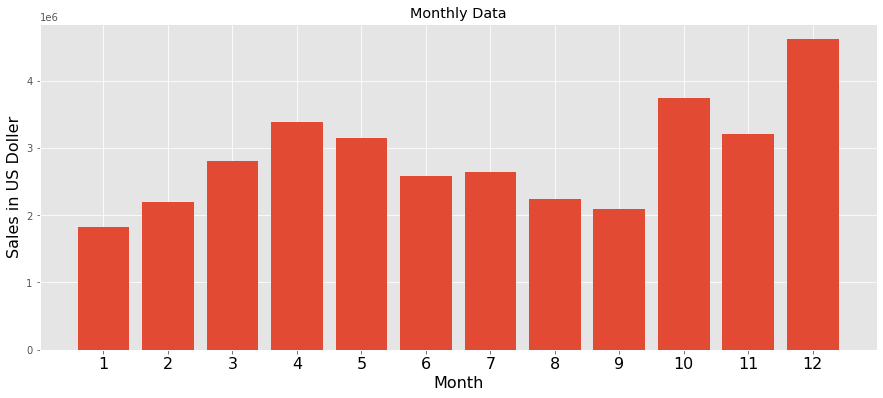

In [36]:
figure(figsize=(15,6))
month=range(1,13)
plt.style.use(['ggplot'])
plt.bar(month,dataset.groupby('Month')['sales'].sum())
plt.title('Monthly Data')
plt.xlabel('Month' , Color="black", fontsize=16)
plt.xticks(month,Color="black", fontsize=16)
plt.ylabel('Sales in US Doller' , Color="black", fontsize=16)

### So as we can see clearly from the figure in the month of December the sales is higher than the other months.


## Now analyse it in hourly basis

## Hourly Trend Analysis

In [37]:
dataset['Hour']=pd.to_datetime(dataset['Order Date']).dt.hour

In [38]:
dataset.groupby('Hour')['sales'].sum()

Hour
0      713870.0
1      460956.0
2      234900.0
3      145791.0
4      162691.0
5      230730.0
6      448211.0
7      745016.0
8     1192591.0
9     1639372.0
10    1944726.0
11    2301096.0
12    2317324.0
13    2155880.0
14    2084095.0
15    1941960.0
16    1905027.0
17    2129779.0
18    2219836.0
19    2413440.0
20    2282224.0
21    2042428.0
22    1607913.0
23    1179557.0
Name: sales, dtype: float64

<ipython-input-39-fcb2eeb433b6>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Hourly Sale' , Color="black" , fontsize=20)
<ipython-input-39-fcb2eeb433b6>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Hour' , Color="black", fontsize=16)
<ipython-input-39-fcb2eeb433b6>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Sales in US Doller' , Color="black", fontsize=16)


Text(0, 0.5, 'Sales in US Doller')

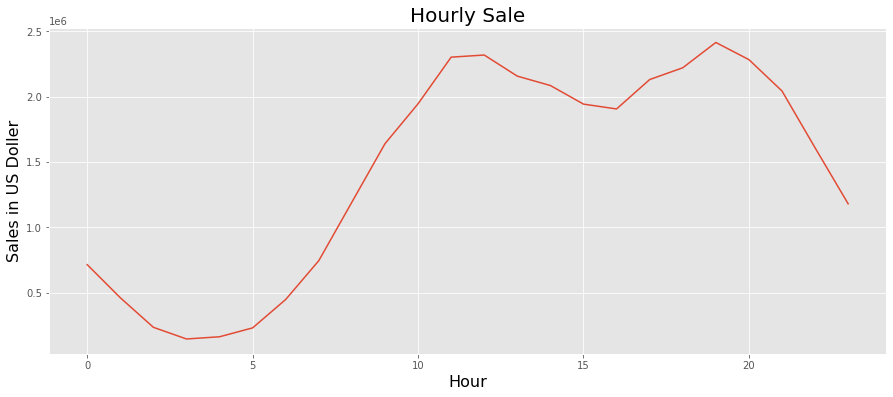

In [39]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6))
plt.plot(dataset.groupby('Hour')['sales'].sum())
plt.title('Hourly Sale' , Color="black" , fontsize=20)
plt.xlabel('Hour' , Color="black", fontsize=16)
plt.ylabel('Sales in US Doller' , Color="black", fontsize=16)

In [40]:
dataset.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,14


## From which City did the most orders occure?

In [41]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [42]:
def address(x):
   return x.split(',')[1]

In [43]:
dataset['Address City']= dataset['Purchase Address'].apply(address)

In [44]:
dataset.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Hour,Address City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0,8,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0,22,Boston


Text(0.5, 1.0, 'Address City')

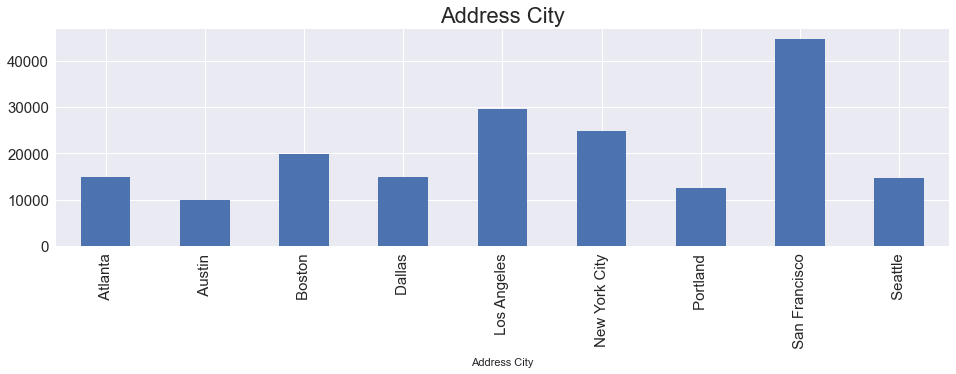

In [45]:
figure(figsize=(16, 4))
plt.style.use(['seaborn'])
dataset.groupby('Address City')['Address City'].count().plot.bar(fontsize=15)
plt.title('Address City', fontsize=22)

### So we can see that from San Fransisco the highest times of sales occured

## Now determine which product is mostly sold by

<AxesSubplot:xlabel='Product'>

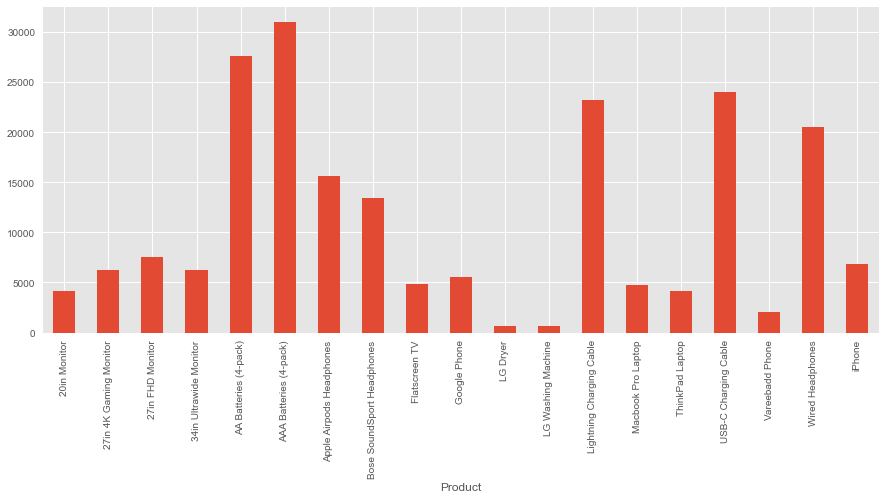

In [46]:
figure(figsize=(15, 6))
plt.style.use(['ggplot'])
dataset.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [47]:
dataset['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

#### So here we can see the 'AAA Batteries (4-pack)' is the product which is highly sold

## Now analyse the product with their mean price

<AxesSubplot:xlabel='Product'>

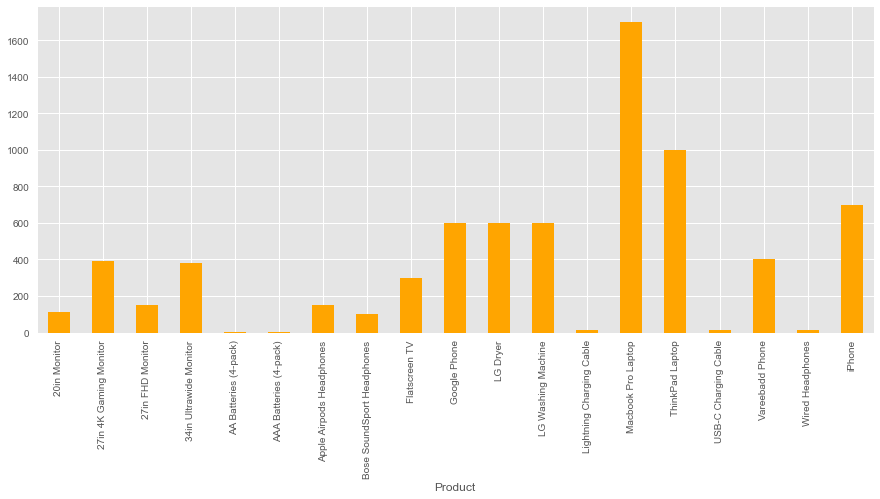

In [48]:
figure(figsize=(15,6))
dataset.groupby('Product')['Price Each'].mean().plot(kind='bar',color='Orange')

### So 'Macbook pro laptop' has the highest mean price

## Now subplot these two graphs of highly sold product and highly expensive product

In [49]:
product=dataset.groupby('Product')['Quantity Ordered'].sum().index

In [50]:
product

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [51]:
quantity=dataset.groupby('Product')['Quantity Ordered'].sum()
price= dataset.groupby('Product')['Price Each'].sum()

### here we will use twinx() function . This function in axes module of mathplotlib  is used to creat a twin axes sharing the x-axis

<ipython-input-52-9618527b7e01>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical' , size=6 , fontsize=16)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 1080x432 with 0 Axes>

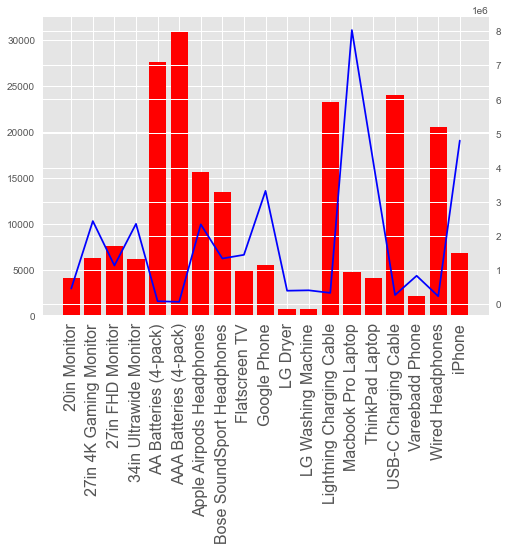

In [52]:
figure(figsize=(15,6))
fig,ax1= plt.subplots()
ax2=ax1.twinx()
ax1.bar(product,quantity,color='red')
ax2.plot(product,price, color='blue')
ax1.set_xticklabels(product, rotation='vertical' , size=6 , fontsize=16)